In [ ]:
#2/18/2024
# NOTES:
# - DCF is no longer considered here since the method is too cumbersome to automate (lots of factors to assume for each company)
# - currently working on how to forecast certain metrics using data science techniques

#NEXT STEPS: add startDate to all applicable functions

In [ ]:
#all the needed modules
from datetime import datetime, timedelta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#dataset by MorningStar
# https://www.quantconnect.com/datasets/morning-star-us-fundamentals
#  FineFundamental Attributes > click all the blue links to get what you need


qb = QuantBook() #open an instance of the QuantBook

#fill out this list with equity symbols to be added to be researched
equitySymbolList = ['AMD', 'INTC','NVDA','QCOM','AVGO','TI', 'NVIDIA']

# ['AMD', 'INTC','NVDA','QCOM','AVGO','TI', 'NVIDIA', symbol, 'IBM'] #['D','SO','NEE','PCG'] #['SRE','PCG','DUK','SO','NEE','AEP','AEE'] #['AAPL','GOOGL','MSFT','AMZN']   #['EIX','PCG','SRE','NEE','XEL','D','PPL'] 
# build the real estate portfolio ['AVB', 'EQR', 'ESS', 'INVH', 'AMH'] # ['DLR'] 
# DLR is a good long term

for mySec in equitySymbolList:
    qb.AddEquity(mySec, dataNormalizationMode=DataNormalizationMode.Adjusted) #adds each equity into the research environment

# data normalization
# https://www.quantconnect.com/docs/v2/research-environment/datasets/us-equity



In [ ]:
startDate=date(2016,1,1) #adjust starting date such that you have n>30 sample data
 
# will use keep='first' because one day before the indicated date is the filing date of the 10-Q containing the indicated value


def hist_multipliers_dict(analysis_sym ,startDate):

    multipliers_dict = {
    'Revenue' : qb.GetFundamental(qb.Securities[analysis_sym].Symbol,f'FinancialStatements.IncomeStatement.TotalRevenue.ThreeMonths',startDate).drop_duplicates(keep='first').dropna(),
    'BasicEPS' : qb.GetFundamental(qb.Securities[analysis_sym].Symbol,f'EarningReports.BasicEPS.ThreeMonths',startDate).drop_duplicates(keep='first').dropna(),
    'BVPS' : qb.GetFundamental(qb.Securities[analysis_sym].Symbol,f'ValuationRatios.BookValuePerShare',startDate).drop_duplicates(keep='first').dropna(),
    'EBITDA' : qb.GetFundamental(qb.Securities[analysis_sym].Symbol,f'FinancialStatements.IncomeStatement.EBITDA.ThreeMonths',startDate).drop_duplicates(keep='first').dropna(),
    'FCF' : qb.GetFundamental(qb.Securities[analysis_sym].Symbol,f'FinancialStatements.CashFlowStatement.FreeCashFlow.ThreeMonths',startDate).drop_duplicates(keep='first').dropna(),
    'SharesOutstanding' : qb.GetFundamental(qb.Securities[analysis_sym].Symbol,'CompanyProfile.SharesOutstanding',startDate).drop_duplicates(keep='first').dropna()

    }

    return multipliers_dict

# testing
hist_multipliers_dict('AVGO', date(2016,1,1))['SharesOutstanding'].head()

In [ ]:
#valuation ratios 
# MorningStar values are close to TTM

def valuation_ratios(ratio, stat, target_company, symbols_list,startDate):

    # error handling - invalid symbol
    if target_company not in symbols_list:
        return print('Invalid Symbol Input')
        
    # error handling - invalid ratio
    if ratio not in ['PERatio', 'EVtoTotalAssets', 'EVtoRevenue', 'EVToEBITDA', 'FCFRatio', 'PBRatio','PSRatio']:
        return print('Invalid ratio Input')

    # error handling - stat
    if stat not in ['max', 'min', 'avg', '25th', '75th','50th']:
        return print('Invalid stat Input')
    


    
    symbols_list = [x for x in symbols_list if x != target_company] #removes the target_company from the list
    

    if ratio == 'PERatio':
        temp_list = []
        for symbol in symbols_list:
            df = qb.GetFundamental(qb.Securities[symbol].Symbol,'ValuationRatios.PERatio',startDate).drop_duplicates(keep='first').dropna()
            try:
                
                temp_list.append( df.iloc[-1][df.columns[0]] ) #extract the cell-value from the most recent data sample
                #print(f' {symbol} {temp_list[-1]} ')
            except:
                print(f'something wrong in PERatio - {symbol}')
                pass


        if stat == 'avg':
            return np.mean(temp_list)
        if stat == 'max':
            return np.max(temp_list)
        if stat == 'min':
            return np.min(temp_list)
        if stat == '25th':
            return np.percentile(temp_list, 25)
        if stat == '75th':
            return np.percentile(temp_list, 75)
        if stat == '50th':
            return np.percentile(temp_list, 50)




    if ratio == 'EVtoTotalAssets':
        temp_list = []
        for symbol in symbols_list:
            df = qb.GetFundamental(qb.Securities[symbol].Symbol,f'ValuationRatios.EVtoTotalAssets',startDate).drop_duplicates(keep='first').dropna()
            try:
                temp_list.append( df.iloc[-1][df.columns[0]] ) #extract the cell-value from the most recent data sample
               
            except:
                print(f'something wrong in EVtoTotalAssets - {symbol}')
                pass

        if stat == 'avg':
            return np.mean(temp_list)
        if stat == 'max':
            return np.max(temp_list)
        if stat == 'min':
            return np.min(temp_list)
        if stat == '25th':
            return np.percentile(temp_list, 25)
        if stat == '75th':
            return np.percentile(temp_list, 75)
        if stat == '50th':
            return np.percentile(temp_list, 50)


    if ratio == 'EVtoRevenue':
        temp_list = []
        for symbol in symbols_list:
            df = qb.GetFundamental(qb.Securities[symbol].Symbol,f'ValuationRatios.EVtoRevenue',startDate).drop_duplicates(keep='first').dropna()
            try:
                temp_list.append( df.iloc[-1][df.columns[0]] ) #extract the cell-value from the most recent data sample
                
            except:
                print(f'something wrong in EVtoRevenue - {symbol}')
                pass

        if stat == 'avg':
            return np.mean(temp_list)
        if stat == 'max':
            return np.max(temp_list)
        if stat == 'min':
            return np.min(temp_list)
        if stat == '25th':
            return np.percentile(temp_list, 25)
        if stat == '75th':
            return np.percentile(temp_list, 75)
        if stat == '50th':
            return np.percentile(temp_list, 50)



    if ratio == 'EVToEBITDA':
        temp_list = []
        for symbol in symbols_list:
            df = qb.GetFundamental(qb.Securities[symbol].Symbol,f'ValuationRatios.EVToEBITDA',startDate).drop_duplicates(keep='first').dropna()
            try:
                temp_list.append( df.iloc[-1][df.columns[0]] ) #extract the cell-value from the most recent data sample
                
            except:
                print(f'something wrong in EVToEBITDA - {symbol}')
                pass

        if stat == 'avg':
            return np.mean(temp_list)
        if stat == 'max':
            return np.max(temp_list)
        if stat == 'min':
            return np.min(temp_list)
        if stat == '25th':
            return np.percentile(temp_list, 25)
        if stat == '75th':
            return np.percentile(temp_list, 75)
        if stat == '50th':
            return np.percentile(temp_list, 50)



    if ratio == 'FCFRatio':
        temp_list = []
        for symbol in symbols_list:
            df = qb.GetFundamental(qb.Securities[symbol].Symbol,f'ValuationRatios.FCFRatio',startDate).drop_duplicates(keep='first').dropna()
            try:
                temp_list.append( df.iloc[-1][df.columns[0]] ) #extract the cell-value from the most recent data sample
                
            except:
                print(f'something wrong in FCFRatio - {symbol}')
                pass

        if stat == 'avg':
            return np.mean(temp_list)
        if stat == 'max':
            return np.max(temp_list)
        if stat == 'min':
            return np.min(temp_list)
        if stat == '25th':
            return np.percentile(temp_list, 25)
        if stat == '75th':
            return np.percentile(temp_list, 75)
        if stat == '50th':
            return np.percentile(temp_list, 50)


    if ratio == 'PBRatio':
        temp_list = []
        for symbol in symbols_list:
            df = qb.GetFundamental(qb.Securities[symbol].Symbol,f'ValuationRatios.PBRatio',startDate).drop_duplicates(keep='first').dropna()
            try:
                temp_list.append( df.iloc[-1][df.columns[0]] ) #extract the cell-value from the most recent data sample
                
            except:
                print(f'something wrong in PBRatio - {symbol}')
                pass

        if stat == 'avg':
            return np.mean(temp_list)
        if stat == 'max':
            return np.max(temp_list)
        if stat == 'min':
            return np.min(temp_list)
        if stat == '25th':
            return np.percentile(temp_list, 25)
        if stat == '75th':
            return np.percentile(temp_list, 75)
        if stat == '50th':
            return np.percentile(temp_list, 50)

    if ratio == 'PSRatio':
        temp_list = []
        for symbol in symbols_list:
            df = qb.GetFundamental(qb.Securities[symbol].Symbol,f'ValuationRatios.PSRatio',startDate).drop_duplicates(keep='first').dropna()
            try:
                temp_list.append( df.iloc[-1][df.columns[0]] ) #extract the cell-value from the most recent data sample
                
            except:
                print(f'something wrong in PSRatio - {symbol}')
                pass

        if stat == 'avg':
            return np.mean(temp_list)
        if stat == 'max':
            return np.max(temp_list)
        if stat == 'min':
            return np.min(temp_list)
        if stat == '25th':
            return np.percentile(temp_list, 25)
        if stat == '75th':
            return np.percentile(temp_list, 75)
        if stat == '50th':
            return np.percentile(temp_list, 50)



In [ ]:
#define a function that converts a specified ratio to implied share price
# TTM values are derived here
# NOTE: outs_sh_df.iloc[-2] is being used because [-1] currently returns zero due to new years

def ratio_to_PPS(ratio, ratio_value_ttm, target_company, startDate):

    # error handling - invalid ratio
    if ratio not in ['PERatio', 'EVtoTotalAssets', 'EVtoRevenue', 'EVToEBITDA', 'FCFRatio', 'PBRatio','PSRatio']:
        return print('Invalid ratio Input')



    if ratio == 'PERatio':
        # PERatio x EPS = PPS
        EPS = qb.GetFundamental(qb.Securities[target_company].Symbol,f'EarningReports.BasicEPS.ThreeMonths',startDate).drop_duplicates(keep='first').dropna()[::-1][:4] #obtain TTM
        EPS_ttm = EPS.sum()[EPS.columns[0]] #extracts the value from the dataframe

        return ratio_value_ttm * EPS_ttm



    if ratio == 'EVtoRevenue':
        # EVtoRevenue x Revenue / outs. sh. = PPS
        TotalRevenue = qb.GetFundamental(qb.Securities[target_company].Symbol,f'FinancialStatements.IncomeStatement.TotalRevenue.ThreeMonths',startDate).drop_duplicates(keep='first').dropna()[::-1][:4] #obtain TTM
        TotalRevenue_ttm = TotalRevenue.sum()[TotalRevenue.columns[0]] #extracts the value from the dataframe
        outs_sh_df = qb.GetFundamental(qb.Securities[target_company].Symbol,'CompanyProfile.SharesOutstanding',startDate).drop_duplicates(keep='first').dropna()
        outs_sh = outs_sh_df.iloc[-2][outs_sh_df.columns[0]] #extracts the most recent data value

        return ratio_value_ttm * TotalRevenue_ttm / outs_sh



    if ratio == 'EVtoTotalAssets':
        # EVtoTotalAssets x TotalAssets / outs. sh = PPS
        TotalAssets = qb.GetFundamental(qb.Securities[target_company].Symbol,f'FinancialStatements.BalanceSheet.TotalAssets.ThreeMonths',startDate).drop_duplicates(keep='first').dropna()[::-1][:4] #obtain TTM
        TotalAssets_ttm = TotalAssets.sum()[TotalAssets.columns[0]] #extracts the value from the dataframe
        outs_sh_df = qb.GetFundamental(qb.Securities[target_company].Symbol,'CompanyProfile.SharesOutstanding',startDate).drop_duplicates(keep='first').dropna()
        outs_sh = outs_sh_df.iloc[-2][outs_sh_df.columns[0]] #extracts the most recent data value

        return ratio_value_ttm * TotalAssets_ttm / outs_sh



    if ratio == 'EVToEBITDA':
        # EVToEBITDA x EBITDA / outs. sh. = PPS
        EBITDA = qb.GetFundamental(qb.Securities[target_company].Symbol,f'FinancialStatements.IncomeStatement.EBITDA.ThreeMonths',startDate).drop_duplicates(keep='first').dropna()[::-1][:4] #obtain TTM
        EBITDA_ttm = EBITDA.sum()[EBITDA.columns[0]] #extracts the value from the dataframe
        outs_sh_df = qb.GetFundamental(qb.Securities[target_company].Symbol,'CompanyProfile.SharesOutstanding',startDate).drop_duplicates(keep='first').dropna()
        outs_sh = outs_sh_df.iloc[-2][outs_sh_df.columns[0]] #extracts the most recent data value

        return ratio_value_ttm * EBITDA_ttm / outs_sh



    if ratio == 'FCFRatio':
        # FCFRatio x FCF / outs. sh. = PPS
        FreeCashFlow = qb.GetFundamental(qb.Securities[target_company].Symbol,f'FinancialStatements.CashFlowStatement.FreeCashFlow.ThreeMonths',startDate).drop_duplicates(keep='first').dropna()[::-1][:4] #obtain TTM
        FreeCashFlow_ttm = FreeCashFlow.sum()[FreeCashFlow.columns[0]] #extracts the value from the dataframe
        outs_sh_df = qb.GetFundamental(qb.Securities[target_company].Symbol,'CompanyProfile.SharesOutstanding',startDate).drop_duplicates(keep='first').dropna()
        outs_sh = outs_sh_df.iloc[-2][outs_sh_df.columns[0]] #extracts the most recent data value

        return ratio_value_ttm * FreeCashFlow_ttm / outs_sh


    if ratio == 'PBRatio':
        # PBRatio x BVPS = PPS 
        BookValuePerShare = qb.GetFundamental(qb.Securities[target_company].Symbol,f'ValuationRatios.BookValuePerShare',startDate).drop_duplicates(keep='first').dropna()[::-1][:4] #obtain TTM
        BookValuePerShare_ttm = BookValuePerShare.sum()[BookValuePerShare.columns[0]] #extracts the value from the dataframe

        return ratio_value_ttm * BookValuePerShare_ttm



    if ratio == 'PSRatio':
        # ps ratio - Adjusted close price / Sales Per Share. If the result is negative or zero, then null
        # PSRatio x Rev/Share = PPS
        SalesPerShare = qb.GetFundamental(qb.Securities[target_company].Symbol,f'ValuationRatios.SalesPerShare',startDate).drop_duplicates(keep='first').dropna()[::-1][:4] #obtain TTM
        SalesPerShare_ttm = SalesPerShare.sum()[SalesPerShare.columns[0]] #extracts the value from the dataframe

        return ratio_value_ttm * SalesPerShare_ttm




    


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

symbol = 'AMD'
startDate = date(2012,1,1) 

adj_pps = qb.GetFundamental(qb.Securities[symbol].Symbol,f'AdjustedPrice',startDate).dropna().iloc[-2][0] #extract the value from df

fig, ax = plt.subplots(figsize=(9.5,5))



boxes = [
    
    # M&A RATIOS
    {
        'label' : "EVtoRevenue",
        'whislo': ratio_to_PPS('EVtoRevenue', valuation_ratios('EVtoRevenue', 'min', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Bottom whisker position
        'q1'    : ratio_to_PPS('EVtoRevenue', valuation_ratios('EVtoRevenue', '25th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # First quartile (25th percentile)
        'med'   : ratio_to_PPS('EVtoRevenue', valuation_ratios('EVtoRevenue', '50th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Median         (50th percentile)
        'q3'    : ratio_to_PPS('EVtoRevenue', valuation_ratios('EVtoRevenue', '75th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Third quartile (75th percentile)
        'whishi': ratio_to_PPS('EVtoRevenue', valuation_ratios('EVtoRevenue', 'max', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Top whisker position
        'fliers': []        # Outliers
    },


    {
        'label' : "EVtoTotalAssets",
        'whislo': ratio_to_PPS('EVtoTotalAssets', valuation_ratios('EVtoTotalAssets', 'min', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Bottom whisker position
        'q1'    : ratio_to_PPS('EVtoTotalAssets', valuation_ratios('EVtoTotalAssets', '25th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # First quartile (25th percentile)
        'med'   : ratio_to_PPS('EVtoTotalAssets', valuation_ratios('EVtoTotalAssets', '50th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Median         (50th percentile)
        'q3'    : ratio_to_PPS('EVtoTotalAssets', valuation_ratios('EVtoTotalAssets', '75th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Third quartile (75th percentile)
        'whishi': ratio_to_PPS('EVtoTotalAssets', valuation_ratios('EVtoTotalAssets', 'max', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Top whisker position
        'fliers': []        # Outliers
    },


    {
        'label' : "EVToEBITDA",
        'whislo': ratio_to_PPS('EVToEBITDA', valuation_ratios('EVToEBITDA', 'min', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Bottom whisker position
        'q1'    : ratio_to_PPS('EVToEBITDA', valuation_ratios('EVToEBITDA', '25th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # First quartile (25th percentile)
        'med'   : ratio_to_PPS('EVToEBITDA', valuation_ratios('EVToEBITDA', '50th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Median         (50th percentile)
        'q3'    : ratio_to_PPS('EVToEBITDA', valuation_ratios('EVToEBITDA', '75th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Third quartile (75th percentile)
        'whishi': ratio_to_PPS('EVToEBITDA', valuation_ratios('EVToEBITDA', 'max', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Top whisker position
        'fliers': []        # Outliers
    },


    # VALUE RATIOS

    {
        'label' : "PE",
        'whislo': ratio_to_PPS('PERatio', valuation_ratios('PERatio', 'min', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Bottom whisker position
        'q1'    : ratio_to_PPS('PERatio', valuation_ratios('PERatio', '25th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # First quartile (25th percentile)
        'med'   : ratio_to_PPS('PERatio', valuation_ratios('PERatio', '50th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Median         (50th percentile)
        'q3'    : ratio_to_PPS('PERatio', valuation_ratios('PERatio', '75th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Third quartile (75th percentile)
        'whishi': ratio_to_PPS('PERatio', valuation_ratios('PERatio', 'max', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Top whisker position
        'fliers': []        # Outliers
    },



    {
        'label' : "FCFRatio",
        'whislo': ratio_to_PPS('FCFRatio', valuation_ratios('FCFRatio', 'min', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Bottom whisker position
        'q1'    : ratio_to_PPS('FCFRatio', valuation_ratios('FCFRatio', '25th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # First quartile (25th percentile)
        'med'   : ratio_to_PPS('FCFRatio', valuation_ratios('FCFRatio', '50th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Median         (50th percentile)
        'q3'    : ratio_to_PPS('FCFRatio', valuation_ratios('FCFRatio', '75th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Third quartile (75th percentile)
        'whishi': ratio_to_PPS('FCFRatio', valuation_ratios('FCFRatio', 'max', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Top whisker position
        'fliers': []        # Outliers
    },

    
    {
        'label' : "PBRatio",
        'whislo': ratio_to_PPS('PBRatio', valuation_ratios('PBRatio', 'min', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Bottom whisker position
        'q1'    : ratio_to_PPS('PBRatio', valuation_ratios('PBRatio', '25th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # First quartile (25th percentile)
        'med'   : ratio_to_PPS('PBRatio', valuation_ratios('PBRatio', '50th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Median         (50th percentile)
        'q3'    : ratio_to_PPS('PBRatio', valuation_ratios('PBRatio', '75th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Third quartile (75th percentile)
        'whishi': ratio_to_PPS('PBRatio', valuation_ratios('PBRatio', 'max', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Top whisker position
        'fliers': []        # Outliers
    },


    #GROWTH RATIOS

    {
        'label' : "PSRatio",
        'whislo': ratio_to_PPS('PSRatio', valuation_ratios('PSRatio', 'min', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Bottom whisker position
        'q1'    : ratio_to_PPS('PSRatio', valuation_ratios('PSRatio', '25th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # First quartile (25th percentile)
        'med'   : ratio_to_PPS('PSRatio', valuation_ratios('PSRatio', '50th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Median         (50th percentile)
        'q3'    : ratio_to_PPS('PSRatio', valuation_ratios('PSRatio', '75th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Third quartile (75th percentile)
        'whishi': ratio_to_PPS('PSRatio', valuation_ratios('PSRatio', 'max', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Top whisker position
        'fliers': []        # Outliers
    }

    
    
]
ax.bxp(boxes, showfliers=False)
ax.set_ylabel("Implied Value Price Per Share")



plt.axhline(y = adj_pps , color = 'r', linestyle = '-') # plots the current adjusted pricer per share of the target symbol
#below is the block of code to label the adj price horizontal line
trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,adj_pps, "{:.2f}".format(adj_pps), color="red", transform=trans, ha="right", va="center")


#set the y-axis limits
ax.set_ylim([0, 1000])


 

when above block is run on QuantConnect
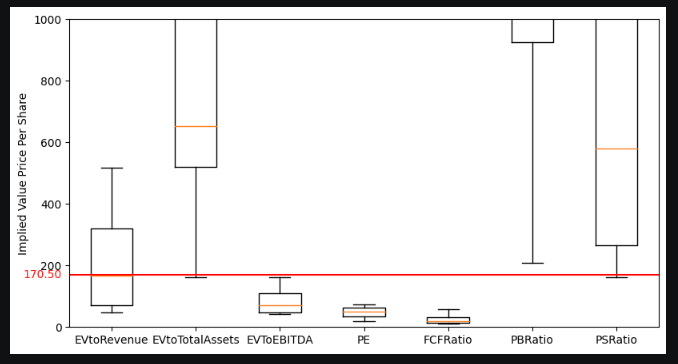

In [ ]:
# for linear regression:  https://www.kaggle.com/code/rodolfomendes/linear-regression-with-one-variable

In [ ]:
# define a function that produces a dataframe of sequential time-series with date-time as index

def X_df_create(start_date=date(2012,1,1), freq='Y', periods=7, int_start=0):

    date_index = pd.date_range(start=start_date, freq=freq, periods=periods)

    return pd.DataFrame(index=date_index, columns=['Time'], data=[x for x in np.arange(start=int_start,stop=(int_start + len(date_index) ))]  )



In [ ]:
#define linear regression function
#NOTES: - this model may not work for companies that has metrics that do not resemble linearity or exponential
#       - I am not comfortable in using linear regression as forecasting financial metrics because even with R^2 > 0.80 on the natural log, it considerably over-estimates the forecasts e.g. AVGO

from sklearn.linear_model import LinearRegression


target_company = 'AMD'
startDate = date(2012,1,1)

# will receive the raw df that resembles exponential curve - will need to take the natural log of the df
my_df = qb.GetFundamental(qb.Securities[target_company].Symbol,f'FinancialStatements.IncomeStatement.TotalRevenue.ThreeMonths',startDate).drop_duplicates(keep='first').dropna()

my_df_ln = np.log(my_df) #take the natural log of the whole df

my_df_ln = my_df_ln.rename(columns={ f'{my_df_ln.columns[0]}' : 'wye' } ) # renames the column

my_df_ln['Time'] = np.arange(len(my_df_ln.index)) # set discrete time which will be treated as the 'X'



#split to X & y as training data to be fed to the model
X = my_df_ln.loc[:, ['Time']]  # features - returns a dataframe - Time is the integer proxy to the date-time index that will be used for linear regression of time-series data
y = my_df_ln.loc[:, 'wye']  # target - returns a series == this is critical to be accepted as an input to the model


#feed to the linear regression model - train the model
model = LinearRegression()
model.fit(X, y) #note that the input X is the sequential integers NOT the date-time


#Store the fitted values as a time series with the same time index as y input
y_LR_ln = pd.DataFrame(data=model.predict(X), index=X.index, columns=['wye_LR']) #this is used to compare against the ln of the original df
y_LR = np.exp(y_LR_ln) # this is used to compaare against the original

#use the test X data generator to generate X_test as extension of the X df to be the input to the prediction method
X_test = X_df_create(start_date=X.index[-1] + np.timedelta64(3, 'D') , freq='3M', periods=10, int_start=X['Time'][-1]+1)

#forecasted/predicted y
y_pred_ln = pd.DataFrame(data=model.predict(X_test), index=X_test.index, columns=['wye_pred'])
y_pred = np.exp(y_pred_ln)


In [ ]:
model.score(X,y) #returns R-squared

In [ ]:
#plots the graphs for the original curves

x = my_df.index
y = my_df[my_df.columns[0]]

plt.figure(figsize=(7,5), dpi=100)

plt.scatter(x,y, label='my_df')
plt.plot(x, y_LR, color='red', label='y_LR')

plt.xlabel('Time 3M')
plt.ylabel('my_df units')

plt.legend()

when above code is run on QuantConnect

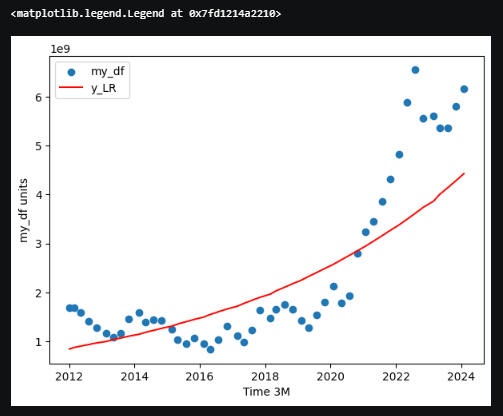

In [2]:
#defined as a function - 3M period
def linear_reg(my_df):

    from sklearn.linear_model import LinearRegression

    if type(my_df) != type(pd.DataFrame()):
        print('my_df input is not a Pandas Dataframe')
        return

    #counts how many NaN in raw data for context - for troubleshooting
    #my_df_nan = np.isnan(my_df)
    #nanCount = my_df_nan[column][ my_df_nan[column] == True ].count()

    # will receive the raw df that resembles exponential curve - will need to take the natural log of the df
    my_df = my_df.drop_duplicates(keep='first').dropna() #handles NaN

    my_df = my_df.rename(columns={ f'{my_df.columns[0]}' : 'wye' } ) # renames the column
    
    my_df['Time'] = np.arange(len(my_df.index)) # set discrete time which will be treated as the 'X'


    #split to X & y as training data to be fed to the model
    X1 = my_df.loc[:, ['Time']]  
    y1 = my_df.loc[:, 'wye']  


    #feed to the normal linear regression (not natural log)
    model1 = LinearRegression()
    model1.fit(X1, y1) 


    #Store the fitted values as a time series with the same time index as y input
    y_LR1 = pd.DataFrame(data=model1.predict(X1), index=X1.index, columns=['wye_LR']) #for normal linear reg

    #use the test X data generator to generate X_test as extension of the X df to be the input to the prediction method
    X_test = X_df_create(start_date=X1.index[-1] + np.timedelta64(3, 'D') , freq='3M', periods=10, int_start=X1['Time'][-1]+1)


    #forecasted/predicted y
    y_pred1 = pd.DataFrame(data=model1.predict(X_test), index=X_test.index, columns=['wye_pred'])

    r_squared1 = model1.score(X1,y1) #returns R-squared for normal reg

    return y_LR1, y_pred1, r_squared1

    #   (comparative LR, forecasted, r-sq normal)
    #   (       0      ,     1     ,      2     )


In [ ]:
#defined as a function - for raw data exhibiting exponential function - 3M period
def linear_reg_exp(my_df):

    from sklearn.linear_model import LinearRegression

    if type(my_df) != type(pd.DataFrame()):
        print('my_df input is not a Pandas Dataframe')
        return 

    if (my_df < 0 ).any()[0]: #check for negative values - natural does not take them
        y_LR_ln = 0 
        y_LR = 0
        y_pred = 0 
        r_squared = 0
        return y_LR_ln, y_LR, y_pred, r_squared

    # will receive the raw df that resembles exponential curve - will need to take the natural log of the df
    my_df = my_df.drop_duplicates(keep='first').dropna() #handles NaN

    my_df = my_df.rename(columns={ f'{my_df.columns[0]}' : 'wye' } ) # renames the column

    my_df_ln = np.log(my_df) #take the natural log of the whole df

    my_df_ln['Time'] = np.arange(len(my_df_ln.index)) # set discrete time which will be treated as the 'X'

    #split to X & y as training data to be fed to the model
    X = my_df_ln.loc[:, ['Time']]  # features - dataframe type- Time is the integer proxy to the date-time index that will be used for linear regression of time-series data
    y = my_df_ln.loc[:, 'wye']  # target - series type == this is critical to be accepted as an input to the model

    #feed to the linear regression model - train the model
    model = LinearRegression()
    model.fit(X, y) #note that the input X is the sequential integers NOT the date-time


    #Store the fitted values as a time series with the same time index as y input
    y_LR_ln = pd.DataFrame(data=model.predict(X), index=X.index, columns=['wye_LR']) #this is used to compare against the ln of the original df
    y_LR = np.exp(y_LR_ln) # this is used to compaare against the original

    #use the test X data generator to generate X_test as extension of the X df to be the input to the prediction method
    X_test = X_df_create(start_date=X.index[-1] + np.timedelta64(3, 'D') , freq='3M', periods=10, int_start=X['Time'][-1]+1)


    #forecasted/predicted y
    y_pred_ln = pd.DataFrame(data=model.predict(X_test), index=X_test.index, columns=['wye_pred'])
    y_pred = np.exp(y_pred_ln)

    r_squared = model.score(X,y) #returns R-squared



    return y_LR_ln, y_LR, y_pred, r_squared

    #   (comparative LR nat. log, comparative LR, forecasted exp, r-sq exp)
    #   (       0               ,         1      ,      2       ,     3   )


In [ ]:
target_company = 'AMD'
startDate = date(2012,1,1) 

rev_df = qb.GetFundamental(qb.Securities[target_company].Symbol,f'FinancialStatements.IncomeStatement.TotalRevenue.ThreeMonths',startDate).drop_duplicates().dropna()

X = rev_df.index
y = rev_df[ rev_df.columns[0] ]

y_LR_exp = linear_reg_exp(rev_df)[1]
y_LR = linear_reg(rev_df)[0]


plt.figure(figsize=(8,5), dpi=100)

plt.title(f'{rev_df.columns[0]} - 3M')
plt.xlabel('Time')
plt.ylabel('USD')

plt.scatter(X,y, label='Revenue 3M')
plt.plot(X, y_LR_exp, color='red', label='Linear Regression Exp')
plt.plot(X, y_LR, color='green', label='Linear Regression')

plt.legend()


when above code is run on QuantConnect

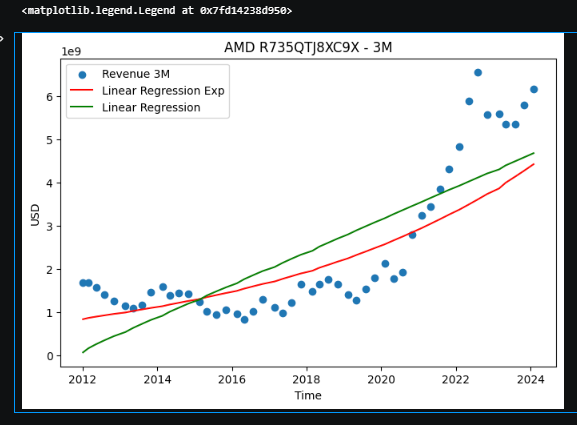

In [ ]:
# outputs the forecasted ttm
#two modes, see comments below
def metric_multiplier( metric_df ):

    metric_df = metric_df.drop_duplicates(keep='first').dropna()

    if linear_reg(metric_df)[2] > linear_reg_exp(metric_df)[3]: #normal r-sq > exp r-sq
        
        #metric_pred = linear_reg( metric_df )[1].iloc[0][0] #choose the n+1 forecasted metric and extract its value
        metric_pred = linear_reg( metric_df )[1][:4] #choose n+1,n+2,n+3.n+4

    else: #normal r-sq < exp r-sq
        
        #metric_pred = linear_reg_exp( metric_df )[2].iloc[0][0]
        metric_pred = linear_reg_exp( metric_df )[2][:4]



    #return ( metric_pred + metric_df[::-1][:3].sum()[0] ) #extract the n, n-1, n-2 from the historical data and add to the forecasted n+1 to obtain forecasted ttm
    return metric_pred.sum()[0] # sum n+1,n+2,n+3.n+4 to obtain forecasted ttm






In [ ]:
#defined using forecasted metrics
# NOTE: each metric may require normal linear regression or natural log linear regression

def ratio_to_PPS2(ratio, ratio_value_ttm, target_company, startDate):

    # error handling - invalid ratio
    if ratio not in ['PERatio', 'EVtoTotalAssets', 'EVtoRevenue', 'EVToEBITDA', 'FCFRatio', 'PBRatio','PSRatio']:
        return print('Invalid ratio Input')



    if ratio == 'PERatio':
        # PERatio x EPS = PPS

        EPS_ttm = metric_multiplier( qb.GetFundamental(qb.Securities[target_company].Symbol,f'EarningReports.BasicEPS.ThreeMonths',startDate) )

        return ratio_value_ttm * EPS_ttm



    if ratio == 'EVtoRevenue':
        # EVtoRevenue x Revenue / outs. sh. = PPS
        TotalRevenue_ttm = metric_multiplier( qb.GetFundamental(qb.Securities[target_company].Symbol,f'FinancialStatements.IncomeStatement.TotalRevenue.ThreeMonths',startDate) )
        outs_sh_df = qb.GetFundamental(qb.Securities[target_company].Symbol,'CompanyProfile.SharesOutstanding',startDate).drop_duplicates(keep='first').dropna()
        outs_sh = outs_sh_df.iloc[-2][outs_sh_df.columns[0]] #extracts the most recent data value

        return ratio_value_ttm * TotalRevenue_ttm / outs_sh



    if ratio == 'EVtoTotalAssets':
        # EVtoTotalAssets x TotalAssets / outs. sh = PPS
        TotalAssets_ttm = metric_multiplier( qb.GetFundamental(qb.Securities[target_company].Symbol,f'FinancialStatements.BalanceSheet.TotalAssets.ThreeMonths',startDate) )
        outs_sh_df = qb.GetFundamental(qb.Securities[target_company].Symbol,'CompanyProfile.SharesOutstanding',startDate).drop_duplicates(keep='first').dropna()
        outs_sh = outs_sh_df.iloc[-2][outs_sh_df.columns[0]] #extracts the most recent data value

        return ratio_value_ttm * TotalAssets_ttm / outs_sh



    if ratio == 'EVToEBITDA':
        # EVToEBITDA x EBITDA / outs. sh. = PPS
        EBITDA_ttm = metric_multiplier( qb.GetFundamental(qb.Securities[target_company].Symbol,f'FinancialStatements.IncomeStatement.EBITDA.ThreeMonths',startDate) )
        outs_sh_df = qb.GetFundamental(qb.Securities[target_company].Symbol,'CompanyProfile.SharesOutstanding',startDate).drop_duplicates(keep='first').dropna()
        outs_sh = outs_sh_df.iloc[-2][outs_sh_df.columns[0]] #extracts the most recent data value

        return ratio_value_ttm * EBITDA_ttm / outs_sh



    if ratio == 'FCFRatio':
        # FCFRatio x FCF / outs. sh. = PPS
        FreeCashFlow_ttm = metric_multiplier( qb.GetFundamental(qb.Securities[target_company].Symbol,f'FinancialStatements.CashFlowStatement.FreeCashFlow.ThreeMonths',startDate) )
        outs_sh_df = qb.GetFundamental(qb.Securities[target_company].Symbol,'CompanyProfile.SharesOutstanding',startDate).drop_duplicates(keep='first').dropna()
        outs_sh = outs_sh_df.iloc[-2][outs_sh_df.columns[0]] #extracts the most recent data value

        return ratio_value_ttm * FreeCashFlow_ttm / outs_sh


    if ratio == 'PBRatio':
        # PBRatio x BVPS = PPS 
        BookValuePerShare_ttm = metric_multiplier( qb.GetFundamental(qb.Securities[target_company].Symbol,f'ValuationRatios.BookValuePerShare',startDate) )

        return ratio_value_ttm * BookValuePerShare_ttm



    if ratio == 'PSRatio':
        # ps ratio - Adjusted close price / Sales Per Share. If the result is negative or zero, then null
        # PSRatio x Rev/Share = PPS
        SalesPerShare_ttm = metric_multiplier( qb.GetFundamental(qb.Securities[target_company].Symbol,f'ValuationRatios.SalesPerShare',startDate) )

        return ratio_value_ttm * SalesPerShare_ttm




    


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

symbol = 'AMD'
startDate = date(2012,1,1)

adj_pps = qb.GetFundamental(qb.Securities[symbol].Symbol,f'AdjustedPrice',startDate).dropna().iloc[-2][0] #extract the value from df

fig, ax = plt.subplots(figsize=(9.5,5))

plt.title(f'{symbol} - compared against {equitySymbolList}')

boxes = [
    
    # M&A RATIOS
    {
        'label' : "EVtoRevenue",
        'whislo': ratio_to_PPS2('EVtoRevenue', valuation_ratios('EVtoRevenue', 'min', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Bottom whisker position
        'q1'    : ratio_to_PPS2('EVtoRevenue', valuation_ratios('EVtoRevenue', '25th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # First quartile (25th percentile)
        'med'   : ratio_to_PPS2('EVtoRevenue', valuation_ratios('EVtoRevenue', '50th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Median         (50th percentile)
        'q3'    : ratio_to_PPS2('EVtoRevenue', valuation_ratios('EVtoRevenue', '75th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Third quartile (75th percentile)
        'whishi': ratio_to_PPS2('EVtoRevenue', valuation_ratios('EVtoRevenue', 'max', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Top whisker position
        'fliers': []        # Outliers
    },


    {
        'label' : "EVtoTotalAssets",
        'whislo': ratio_to_PPS2('EVtoTotalAssets', valuation_ratios('EVtoTotalAssets', 'min', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Bottom whisker position
        'q1'    : ratio_to_PPS2('EVtoTotalAssets', valuation_ratios('EVtoTotalAssets', '25th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # First quartile (25th percentile)
        'med'   : ratio_to_PPS2('EVtoTotalAssets', valuation_ratios('EVtoTotalAssets', '50th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Median         (50th percentile)
        'q3'    : ratio_to_PPS2('EVtoTotalAssets', valuation_ratios('EVtoTotalAssets', '75th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Third quartile (75th percentile)
        'whishi': ratio_to_PPS2('EVtoTotalAssets', valuation_ratios('EVtoTotalAssets', 'max', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Top whisker position
        'fliers': []        # Outliers
    },


    {
        'label' : "EVToEBITDA",
        'whislo': ratio_to_PPS2('EVToEBITDA', valuation_ratios('EVToEBITDA', 'min', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Bottom whisker position
        'q1'    : ratio_to_PPS2('EVToEBITDA', valuation_ratios('EVToEBITDA', '25th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # First quartile (25th percentile)
        'med'   : ratio_to_PPS2('EVToEBITDA', valuation_ratios('EVToEBITDA', '50th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Median         (50th percentile)
        'q3'    : ratio_to_PPS2('EVToEBITDA', valuation_ratios('EVToEBITDA', '75th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Third quartile (75th percentile)
        'whishi': ratio_to_PPS2('EVToEBITDA', valuation_ratios('EVToEBITDA', 'max', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Top whisker position
        'fliers': []        # Outliers
    },


    # VALUE RATIOS

    {
        'label' : "PE",
        'whislo': ratio_to_PPS2('PERatio', valuation_ratios('PERatio', 'min', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Bottom whisker position
        'q1'    : ratio_to_PPS2('PERatio', valuation_ratios('PERatio', '25th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # First quartile (25th percentile)
        'med'   : ratio_to_PPS2('PERatio', valuation_ratios('PERatio', '50th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Median         (50th percentile)
        'q3'    : ratio_to_PPS2('PERatio', valuation_ratios('PERatio', '75th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Third quartile (75th percentile)
        'whishi': ratio_to_PPS2('PERatio', valuation_ratios('PERatio', 'max', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Top whisker position
        'fliers': []        # Outliers
    },



    {
        'label' : "FCFRatio",
        'whislo': ratio_to_PPS2('FCFRatio', valuation_ratios('FCFRatio', 'min', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Bottom whisker position
        'q1'    : ratio_to_PPS2('FCFRatio', valuation_ratios('FCFRatio', '25th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # First quartile (25th percentile)
        'med'   : ratio_to_PPS2('FCFRatio', valuation_ratios('FCFRatio', '50th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Median         (50th percentile)
        'q3'    : ratio_to_PPS2('FCFRatio', valuation_ratios('FCFRatio', '75th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Third quartile (75th percentile)
        'whishi': ratio_to_PPS2('FCFRatio', valuation_ratios('FCFRatio', 'max', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Top whisker position
        'fliers': []        # Outliers
    },

    
    {
        'label' : "PBRatio",
        'whislo': ratio_to_PPS2('PBRatio', valuation_ratios('PBRatio', 'min', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Bottom whisker position
        'q1'    : ratio_to_PPS2('PBRatio', valuation_ratios('PBRatio', '25th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # First quartile (25th percentile)
        'med'   : ratio_to_PPS2('PBRatio', valuation_ratios('PBRatio', '50th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Median         (50th percentile)
        'q3'    : ratio_to_PPS2('PBRatio', valuation_ratios('PBRatio', '75th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Third quartile (75th percentile)
        'whishi': ratio_to_PPS2('PBRatio', valuation_ratios('PBRatio', 'max', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Top whisker position
        'fliers': []        # Outliers
    },


    #GROWTH RATIOS

    {
        'label' : "PSRatio",
        'whislo': ratio_to_PPS2('PSRatio', valuation_ratios('PSRatio', 'min', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Bottom whisker position
        'q1'    : ratio_to_PPS2('PSRatio', valuation_ratios('PSRatio', '25th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # First quartile (25th percentile)
        'med'   : ratio_to_PPS2('PSRatio', valuation_ratios('PSRatio', '50th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Median         (50th percentile)
        'q3'    : ratio_to_PPS2('PSRatio', valuation_ratios('PSRatio', '75th', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Third quartile (75th percentile)
        'whishi': ratio_to_PPS2('PSRatio', valuation_ratios('PSRatio', 'max', symbol, equitySymbolList, startDate) ,symbol, startDate),    # Top whisker position
        'fliers': []        # Outliers
    }

    
    
]
ax.bxp(boxes, showfliers=False)
ax.set_ylabel("Implied Value Price Per Share")



plt.axhline(y = adj_pps , color = 'r', linestyle = '-') # plots the current adjusted pricer per share of the target symbol
#below is the block of code to label the adj price horizontal line
trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,adj_pps, "{:.2f}".format(adj_pps), color="red", transform=trans, ha="right", va="center")


#set the y-axis limits
ax.set_ylim([0, 400])



when above block is run on QuantConnect

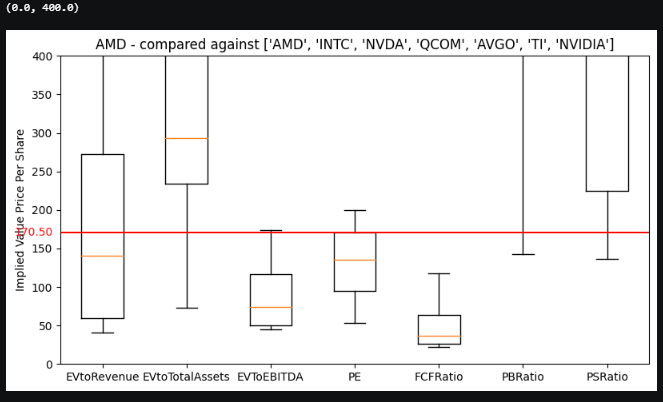